In [3]:
! ls ../../../../DisqueDeDonnees/'3. ENIGMA Strasbourg - jeux et paperasse'/9.Reconnaissance-d-images/images/0.Cathedrale-de-Strasbourg

1.cathedrale-01.jpeg  1.cathedrale-24.jpeg  1.cathedrale-47.jpg
1.cathedrale-02.jpeg  1.cathedrale-25.jpeg  1.cathedrale-48.jpg
1.cathedrale-03.jpeg  1.cathedrale-26.jpeg  1.cathedrale-49.jpg
1.cathedrale-04.jpeg  1.cathedrale-27.jpeg  1.cathedrale-50.jpg
1.cathedrale-05.jpeg  1.cathedrale-28.jpeg  1.cathedrale-51.jpg
1.cathedrale-06.jpeg  1.cathedrale-29.jpeg  1.cathedrale-52.jpg
1.cathedrale-07.jpeg  1.cathedrale-30.jpeg  1.cathedrale-53.jpg
1.cathedrale-08.jpeg  1.cathedrale-31.jpg   1.cathedrale-54.jpg
1.cathedrale-09.jpeg  1.cathedrale-32.jpg   1.cathedrale-55.jpg
1.cathedrale-10.jpeg  1.cathedrale-33.jpg   1.cathedrale-56.jpg
1.cathedrale-11.jpeg  1.cathedrale-34.jpg   1.cathedrale-57.jpg
1.cathedrale-12.jpeg  1.cathedrale-35.jpg   1.cathedrale-58.jpg
1.cathedrale-13.jpeg  1.cathedrale-36.jpg   1.cathedrale-59.jpg
1.cathedrale-14.jpeg  1.cathedrale-37.jpg   1.cathedrale-60.jpg
1.cathedrale-15.jpeg  1.cathedrale-38.jpg   1.cathedrale-61.jpg
1.cathedrale-16.jpeg  1.cathedrale-39.jp

In [5]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle

#### Resize images and organise them in a dictionnary

In [20]:
dir_path = os.path.join('..', '..', '..', '..', \
                       'DisqueDeDonnees', \
                       '3. ENIGMA Strasbourg - jeux et paperasse', \
                       '9.Reconnaissance-d-images', \
                       'images')

directories = os.listdir(dir_path)
directories.sort()

y = list()
target_names = dict()
images = list()
target_name_for_answer = dict()

for i, sub_dir in enumerate(directories):
    sub_dir_path = os.path.join(dir_path, sub_dir)
    target_names[i] = sub_dir
    if 'cathedrale' in sub_dir.lower():
        target_name_for_answer[i] = 'la Cathédrale de Strasbourg.'
    elif 'pontonniers' in sub_dir.lower():
        target_name_for_answer[i] = 'le Lycée International des Pontonniers.'
    elif 'thomas' in sub_dir.lower():
        target_name_for_answer[i] = 'l\'église St Thomas.'
    elif 'rohan' in sub_dir.lower() and 'ill' in sub_dir.lower():
        target_name_for_answer[i] = 'le Palais Rohan depuis le quai des bateliers.'
    elif 'rohan' in sub_dir.lower() and 'chateau' in sub_dir.lower():
        target_name_for_answer[i] = 'le Palais Rohan depuis la place du château.'
    elif 'opéra' in sub_dir.lower():
        target_name_for_answer[i] = 'l\'opéra à la place Broglie'
    elif 'aubette' in sub_dir.lower():
        target_name_for_answer[i] = 'l\'Aubette à la place Kléber'
    
    
    for image_name in os.listdir(sub_dir_path):
        image_path = os.path.join(sub_dir_path, image_name)
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, (64, 64))
        
        images.append(resized_image)
        
        y.append(i)
        
y = np.array(y)

data = dict()
data['images'] = np.array(images)
data['target_names'] = target_names
data['target_name_for_answer'] = target_name_for_answer
data['y'] = y

In [34]:
data

{'images': array([[[[197, 199, 208],
          [203, 203, 217],
          [191, 192, 202],
          ...,
          [ 83,  60,  40],
          [100,  69,  74],
          [ 53,  81,  91]],
 
         [[196, 196, 207],
          [195, 194, 210],
          [220, 220, 232],
          ...,
          [ 90,  72,  61],
          [102,  85,  98],
          [102, 125, 141]],
 
         [[171, 171, 183],
          [162, 160, 179],
          [181, 181, 194],
          ...,
          [125, 111, 110],
          [ 62,  65,  86],
          [146, 163, 180]],
 
         ...,
 
         [[235, 190, 165],
          [231, 185, 178],
          [ 77,  55,  35],
          ...,
          [237, 211, 199],
          [240, 215, 198],
          [243, 217, 201]],
 
         [[238, 193, 168],
          [224, 184, 175],
          [172, 144, 123],
          ...,
          [239, 214, 202],
          [239, 214, 198],
          [237, 217, 203]],
 
         [[240, 195, 170],
          [225, 192, 180],
          [234, 201,

In [35]:
with open(os.path.join('..', 'data', 'data-64.pkl'), 'wb') as f:
    pickle.dump(data, f)

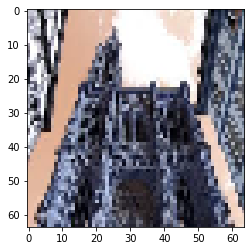

In [23]:
plt.imshow(data['images'][0])
plt.show()